In [100]:
#Importando las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [101]:
#Leyendo la data
df_salary = pd.read_csv('../data/Salary_data.csv')
df_salary.columns #Observamos los nombres de sus columnas

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')

In [102]:
df_salary.Education.unique()

array([nan, 'PhD', "Master's Degree", "Bachelor's Degree", 'Some College',
       'Highschool'], dtype=object)

In [103]:
#Seleccionamos las columnas con las que trabajaremos
selected_columns = ['company','title','totalyearlycompensation','location','yearsofexperience','yearsatcompany','tag','basesalary','stockgrantvalue',
                    'bonus','gender','Race','Education']

In [122]:
#Creamos una nueva tabla para trabajar con ella
df = df_salary[selected_columns].copy()
df.shape

(62642, 13)

In [105]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000


In [106]:
df.isnull().sum()

company                        5
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          854
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
Race                       40215
Education                  32272
dtype: int64

In [125]:
#Como obersvamos que los valores nulos se encuentran dentro de las columnas de tipo texto, les hacemos un filtro básico
df_filtrado = df.fillna({'company':'No especificado','tag':'No especificado','gender':'No especificado','Race':'No especificado','Education':'No especificado',})
df = df_filtrado
df.isnull().sum()

company                    0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
basesalary                 0
stockgrantvalue            0
bonus                      0
gender                     0
Race                       0
Education                  0
dtype: int64

<AxesSubplot:>

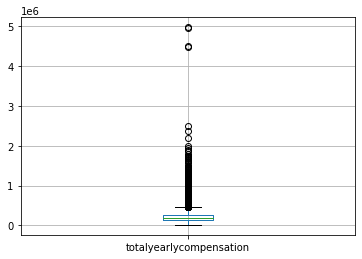

In [108]:
df.boxplot('totalyearlycompensation') #Se observa un sesgo en cuanto a la recolección de datos, contamos con demasiados valores atípicos

In [109]:
#new_df = df[df['totalyearlycompensation'].between(df['totalyearlycompensation'].quantile(.05),df['totalyearlycompensation'].quantile(.95))]

In [110]:
#Agrupamos las columnas con sus respectivos valores (numéricos y textos)
numeric_columns = df.select_dtypes(include=[float, int]).columns
text_columns = df.select_dtypes(include=[object]).columns

numeric_columns, text_columns

(Index(['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany',
        'basesalary', 'stockgrantvalue', 'bonus'],
       dtype='object'),
 Index(['company', 'title', 'location', 'tag', 'gender', 'Race', 'Education'], dtype='object'))

In [111]:
#Con esta función encontramos el valor a partir del cual se considera outlier
def find_max_value(df_column):
    max_value = df_column.mean() + 3 * df_column.std()
    return max_value
#Con esta función creamos una columna de 1, 0 para saber si es outlier o no
def find_outliers(x, max_value):
    if x>max_value:
        return 1 
    else: return 0

for column in numeric_columns:
    max_value = find_max_value(df[column])
    df[column+"_outlier"] = df[column].apply(lambda x: find_outliers(x, max_value))

In [112]:
outlier_columns = [column for column in df.columns if "outlier" in column]
outlier_columns

['totalyearlycompensation_outlier',
 'yearsofexperience_outlier',
 'yearsatcompany_outlier',
 'basesalary_outlier',
 'stockgrantvalue_outlier',
 'bonus_outlier']

In [113]:
df[outlier_columns].describe()

,totalyearlycompensation_outlier,yearsofexperience_outlier,yearsatcompany_outlier,basesalary_outlier,stockgrantvalue_outlier,bonus_outlier
count,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,0.014750,0.012244,0.021359,0.005875,0.021822,0.016778
std,0.120553,0.109975,0.144581,0.076421,0.146105,0.128439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [114]:
# Como hay muy pocos outliers, solo los eliminaremos
df["outlier"] = df[outlier_columns].sum(axis=1)
df = df[df["outlier"]==0].reset_index(drop=True).copy()

In [115]:
df = df.drop(outlier_columns+["outlier"], axis=1).copy()
df.shape

(58362, 13)

<AxesSubplot:>

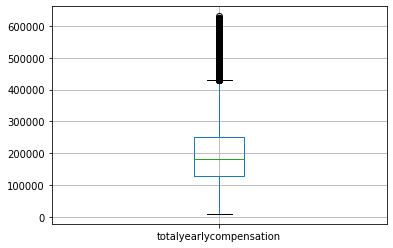

In [116]:
df.boxplot('totalyearlycompensation')

# 

## Análisis exploratorio de datos (EDA)

In [118]:
profile = pp.ProfileReport(df, title='Pandas Profiling Report', minimal=True)

In [120]:
profile.to_file('../data/reports/Data_salary.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 333.01it/s]


#### Preguntas de exploración

1. ¿En qué compañía facturan más los profesionales en ciencias de datos?
2. ¿Cuál es % de personas que laboran de acuerdo a su nivel de educación?
3. ¿Cuál es el % de participación por genero en este campo?